<a href="https://colab.research.google.com/github/aserra96/Binary_IO_Practice/blob/main/MAIN_CS4661_PROJECT_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
import pandas as pd

In [ ]:
df_sample = pd.read_csv('https://raw.githubusercontent.com/248KMB/SpaceShipTatanic/main/sample_submission.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/248KMB/SpaceShipTatanic/main/test.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/248KMB/SpaceShipTatanic/main/train.csv')

In [ ]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
# Handle missing values by filling them with the mean of the respective columns
df_train.fillna(df_train.mean(), inplace=True)

<ipython-input-7-d38401c2b0e1>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.fillna(df_train.mean(), inplace=True)


**After filling the empty cols with the mean of each respective col, we chose to delete the newly created cols 'CryoSleep_0.35830580462482303' 'VIP_0.023439340400471142' since these cols are no longer needed**

In [ ]:
# creates dummy colums using get_dummies func and selecting the cols Thal and ChestPain from dataframe
df_train_encoded = pd.get_dummies(df_train, columns = ['HomePlanet', 'CryoSleep' ,'VIP'] )

df_train_encoded.head()# prints newly encoded data with the categorical cols

,PassengerId,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_0.35830580462482303,CryoSleep_True,VIP_False,VIP_0.023439340400471142,VIP_True
0,0001_01,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,1,0,0,1,0,0
1,0002_01,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,1,0,0,1,0,0
2,0003_01,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,1,0,0,0,0,1
3,0003_02,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,1,0,0,1,0,0
4,0004_01,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,1,0,0,1,0,0


In [ ]:
# List of columns to be deleted
columns_to_delete = ['CryoSleep_0.35830580462482303', 'VIP_0.023439340400471142']

# Use the drop method to remove the specified columns
df_train_encoded = df_train_encoded.drop(columns=columns_to_delete)
df_train_encoded.head()# prints newly encoded data with the categorical cols


,PassengerId,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True
0,0001_01,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,1,0,1,0
1,0002_01,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,1,0,1,0
2,0003_01,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,1,0,0,1
3,0003_02,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,1,0,1,0
4,0004_01,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,1,0,1,0


In [ ]:
feature_cols = ['Age', 'HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars','CryoSleep_False','CryoSleep_True','VIP_False','VIP_True']
X = df_train_encoded[feature_cols]
y = df_train['Transported']

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9) # splits

# KNN Classifier


****

In [ ]:
# Assuming you have already loaded and preprocessed your data (X_train, X_test, y_train, y_test)

# Define a list of k values
k_values = list(range(1, 31, 5))

# Initialize variables to store the highest accuracy and corresponding k value
highest_accuracy = 0
best_k = 0

# Loop through each k value and print the accuracy
for k in k_values:
    # Initialize and train the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    y_predict = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)

    # Print accuracy for the current k value
    print(f"Accuracy on Testing Data of KNN Classifier with k={k}: {round(accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_k = k

# Print the highest accuracy and corresponding k value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (k={best_k})")

Accuracy on Testing Data of KNN Classifier with k=1: 0.65
Accuracy on Testing Data of KNN Classifier with k=6: 0.69
Accuracy on Testing Data of KNN Classifier with k=11: 0.72
Accuracy on Testing Data of KNN Classifier with k=16: 0.72
Accuracy on Testing Data of KNN Classifier with k=21: 0.73
Accuracy on Testing Data of KNN Classifier with k=26: 0.73

Highest Accuracy: 0.73 (k=21)


# KNN with Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# List of k values for KNN
k_values = list(range(1, 35, 5))

# Feature matrix (X) and target variable (y)
# (Assuming you have already defined X and y)

# Initialize variables to keep track of the highest accuracy and corresponding k value
highest_accuracy = 0  # Assuming accuracy is between 0 and 1
best_k = 0

# Iterate over different k values
for k in k_values:
    # Create KNN classifier with current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Perform k-fold cross-validation and calculate accuracy scores
    knn_scores = cross_val_score(knn_classifier, X, y, cv=10, scoring='accuracy')

    # Calculate mean accuracy across folds
    knn_mean_accuracy = knn_scores.mean()

    # Print the mean accuracy for the current k value
    print(f"KNN with k={k} - Mean Accuracy: {round(knn_mean_accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if knn_mean_accuracy > highest_accuracy:
        highest_accuracy = knn_mean_accuracy
        best_k = k

# Print the highest accuracy and corresponding k value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (k={best_k})")

KNN with k=1 - Mean Accuracy: 0.64
KNN with k=6 - Mean Accuracy: 0.69
KNN with k=11 - Mean Accuracy: 0.7
KNN with k=16 - Mean Accuracy: 0.72
KNN with k=21 - Mean Accuracy: 0.72
KNN with k=26 - Mean Accuracy: 0.73
KNN with k=31 - Mean Accuracy: 0.73

Highest Accuracy: 0.73 (k=26)


# Decision Tree Classifier

****

**Only when splitting the training and testing data is where it dictates the rest of the values's accruacy**

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40) # splits

In [ ]:

# List of random state values
random_state_values = list(range(1, 11))

# Assuming you have already defined X_train, X_test, y_train, y_test

highest_accuracy = 0  # Assuming accuracy is between 0 and 1
best_random_state_value = 0

for r in random_state_values:
    # Create Decision Tree classifier with the current random state
    dt_classifier = DecisionTreeClassifier(random_state=r)

    # Train the classifier on the training data
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_predict = dt_classifier.predict(X_test)

    # Calculate accuracy on the test data
    accuracy = accuracy_score(y_test, y_predict)

    # Print accuracy for the current random state value
    print(f"Accuracy on Testing Data of Decision Tree Classifier with random_state={r}: {round(accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_random_state_value = r

# Print the highest accuracy and corresponding random state value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (random_state={best_random_state_value})")

Accuracy on Testing Data of Decision Tree Classifier with random_state=1: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=2: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=3: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=4: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=5: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=6: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=7: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=8: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=9: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=10: 0.74

Highest Accuracy: 0.74 (random_state=10)


# Decision Tree Classifier with Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# List of random state values
random_state_values = list(range(1, 11))

# Assuming you have already defined X and y

highest_accuracy = 0  # Assuming accuracy is between 0 and 1
best_random_state_value = 0

for r in random_state_values:
    # Create Decision Tree classifier with the current random state
    dt_classifier = DecisionTreeClassifier(random_state=r)

    # Perform k-fold cross-validation and calculate accuracy scores
    tree_scores = cross_val_score(dt_classifier, X, y, cv=10, scoring='accuracy')

    # Calculate mean accuracy across folds
    tree_mean_accuracy = tree_scores.mean()

    # Print accuracy for the current random state value
    print(f"Mean Accuracy of Decision Tree Classifier with random_state={r}: {round(tree_mean_accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if tree_mean_accuracy > highest_accuracy:
        highest_accuracy = tree_mean_accuracy
        best_random_state_value = r

# Print the highest accuracy and corresponding random state value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (random_state={best_random_state_value})")

Mean Accuracy of Decision Tree Classifier with random_state=1: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=2: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=3: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=4: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=5: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=6: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=7: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=8: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=9: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=10: 0.72

Highest Accuracy: 0.72 (random_state=2)


# Logistic Regression Classifier


****

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5) # splits

In [ ]:
# Define a list of max_iter values
maxIter_values = list(range(100, 525, 25))

# Assuming you have already defined X_train, X_test, y_train, y_test

# Initialize variables to store the highest accuracy and corresponding max_iter value
highest_accuracy = 0
best_max = 0

for x in maxIter_values:
    # Create Logistic Regression classifier with the current max_iter value
    lr_classifier = LogisticRegression(max_iter=x)

    # Train the classifier on the training data
    lr_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_predict = lr_classifier.predict(X_test)

    # Calculate accuracy on the test data
    accuracy = accuracy_score(y_test, y_predict)

    # Print accuracy for the current max_iter value
    print(f"Accuracy on Testing Data of Logistic Regression Classifier with max_iter={x}: {round(accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_max = x

# Print the highest accuracy and corresponding max_iter value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (max_iter={best_max})")

Accuracy on Testing Data of Logistic Regression Classifier with max_iter=100: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=125: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=150: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=175: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=200: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=225: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=250: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=275: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=300: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=325: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=350: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=375: 0.7
Accuracy on Test

# Logistic Regression with Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a list of max_iter values
maxIter_values = list(range(200, 525, 25))

# Assuming you have already defined X and y

# Initialize variables to store the highest accuracy and corresponding max_iter value
highest_accuracy = 0
best_max = 0

for x in maxIter_values:
    # Create Logistic Regression classifier with the current max_iter value
    lr_classifier = LogisticRegression(max_iter=x)

    # Perform k-fold cross-validation and calculate accuracy scores
    logistic_scores = cross_val_score(lr_classifier, X, y, cv=10, scoring='accuracy')

    # Calculate mean accuracy across folds
    logistic_mean_accuracy = np.mean(logistic_scores)

    # Print mean accuracy for the current max_iter value
    print(f"Logistic Regression with max_iter={x} - Mean Accuracy: {round(logistic_mean_accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if logistic_mean_accuracy > highest_accuracy:
        highest_accuracy = logistic_mean_accuracy
        best_max = x

# Print the highest accuracy and corresponding max_iter value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (max_iter={best_max})")

Logistic Regression with max_iter=200 - Mean Accuracy: 0.71
Logistic Regression with max_iter=225 - Mean Accuracy: 0.71
Logistic Regression with max_iter=250 - Mean Accuracy: 0.71
Logistic Regression with max_iter=275 - Mean Accuracy: 0.71
Logistic Regression with max_iter=300 - Mean Accuracy: 0.71
Logistic Regression with max_iter=325 - Mean Accuracy: 0.71
Logistic Regression with max_iter=350 - Mean Accuracy: 0.71
Logistic Regression with max_iter=375 - Mean Accuracy: 0.71
Logistic Regression with max_iter=400 - Mean Accuracy: 0.71
Logistic Regression with max_iter=425 - Mean Accuracy: 0.71
Logistic Regression with max_iter=450 - Mean Accuracy: 0.71
Logistic Regression with max_iter=475 - Mean Accuracy: 0.71
Logistic Regression with max_iter=500 - Mean Accuracy: 0.71

Highest Accuracy: 0.71 (max_iter=200)


# Graphs

****

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-16-06c6a7ab25bf>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_train_encoded, x='Age_Bins', y='Transported', ci=None)


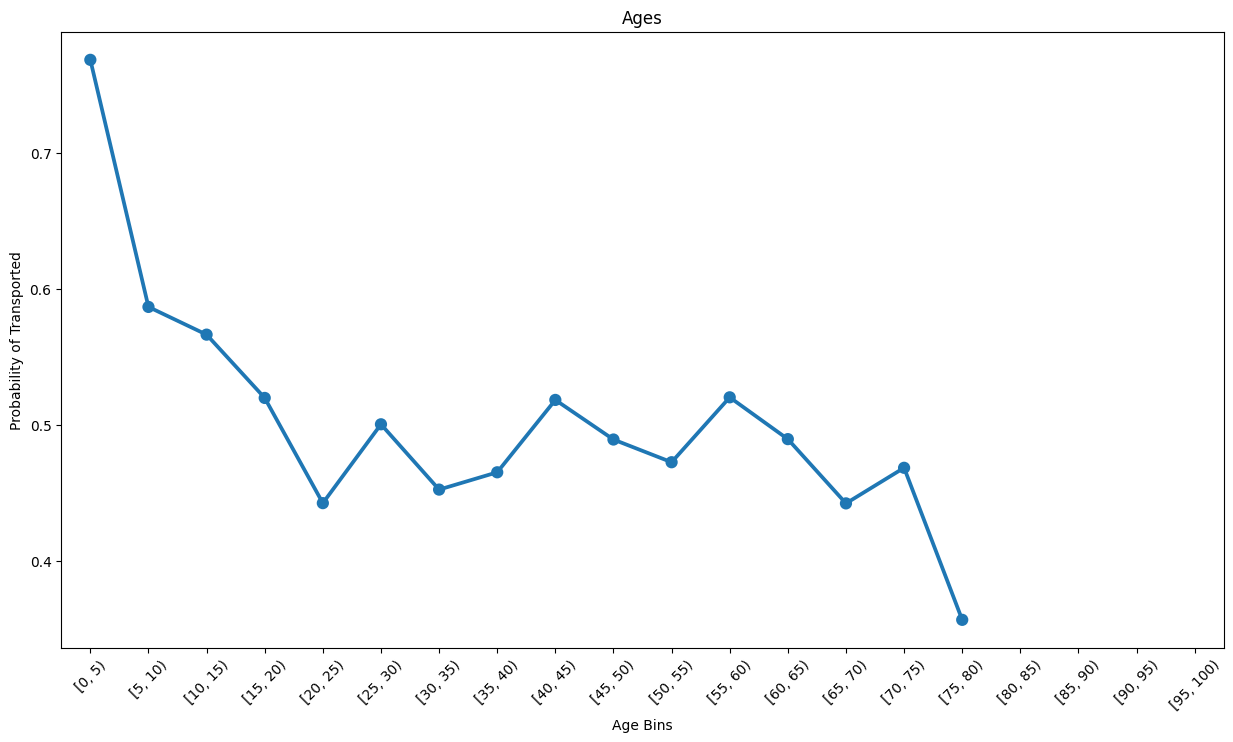

In [ ]:
plt.figure(figsize=(15, 8))

# Create age bins
df_train_encoded['Age_Bins'] = pd.cut(df_train['Age'], bins=range(0, 101, 5), right=False)

# Using pointplot to show the probability of Transported being 1 at different age bins
sns.pointplot(data=df_train_encoded, x='Age_Bins', y='Transported', ci=None)

plt.xlabel('Age Bins')
plt.ylabel('Probability of Transported')
plt.title('Ages')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

<ipython-input-17-28e2c41b2fcc>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=average_probs, x='HomePlanet_Earth', y='Transported', ci=None)


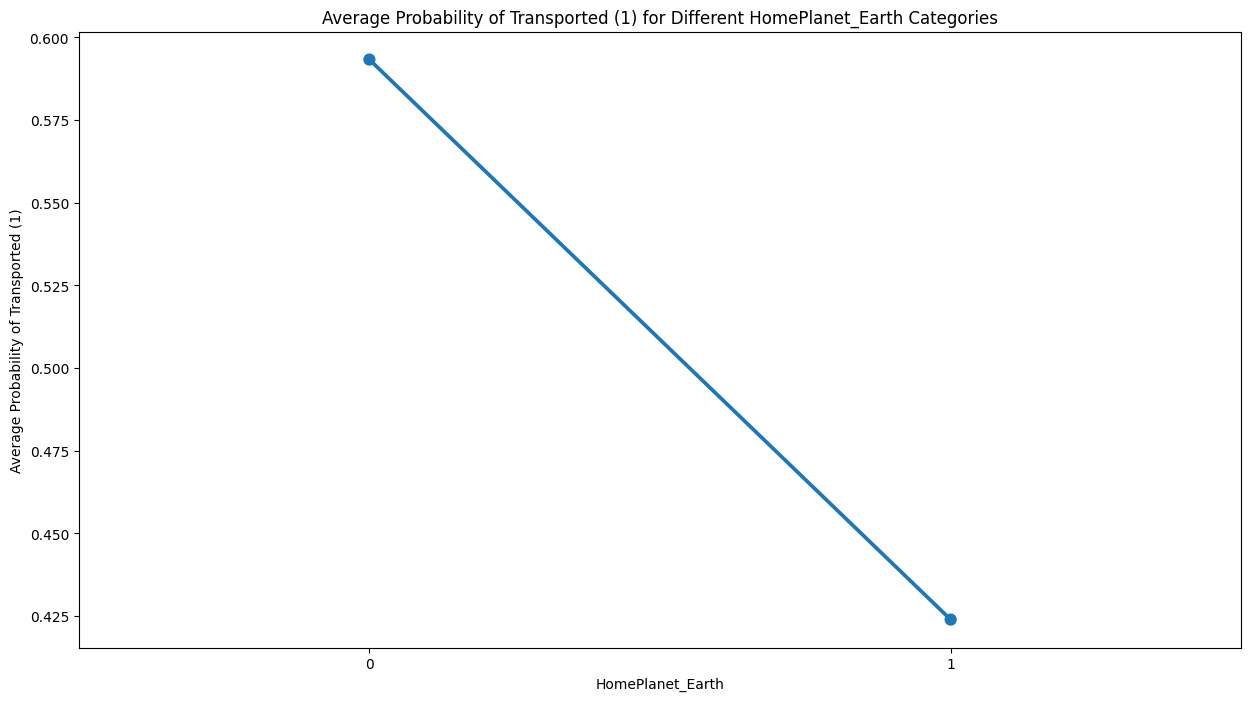

In [ ]:
plt.figure(figsize=(15, 8))

# Assuming df_train is your DataFrame

# Calculate the average probability of Transported being 1 for each category of HomePlanet_Earth
average_probs = df_train_encoded.groupby('HomePlanet_Earth')['Transported'].mean().reset_index()

# Using pointplot to show the average probability of Transported being 1 for each category of HomePlanet_Earth
sns.pointplot(data=average_probs, x='HomePlanet_Earth', y='Transported', ci=None)

plt.xlabel('HomePlanet_Earth')
plt.ylabel('Average Probability of Transported (1)')
plt.title('Average Probability of Transported (1) for Different HomePlanet_Earth Categories')

plt.show()